In [1]:
import numpy as np
import pandas as pd

In [2]:
#setting file path and reading xls file
basket_data_path = 'C:\\Datasets\\Data.xlsx'
excel_file = pd.ExcelFile(basket_data_path)

In [3]:
#reading separated sheets from the xlsx file
pos_df = pd.read_excel(excel_file, 'POS DATA')
loyalty_df = pd.read_excel(excel_file, 'LOYALTY')
barcodes_df = pd.read_excel(excel_file, 'barcodes')
taxonomy_df = pd.read_excel(excel_file, 'product taxonomy')

In [4]:
#view data importing
pos_df.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,41379,800220505783,2,1.960000,9.160004e+12
1,1103853519,41381,520139501183,1,5.349993,9.164002e+12
2,1092750793,41346,520423907421,6,1.740015,9.164013e+12


In [5]:
#clean data: Convert MS Excel (Date int numbers) into Pandas readable dates. Convert Card_ID into String (remove decimals .00)
pos_df['Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(pos_df.Date, 'D')
pos_df["Card_ID"] = pos_df.Card_ID.astype(str).replace('\.0', '', regex=True)
pos_df.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385


In [6]:
# check final columns types
pos_df.dtypes

Basket_ID             int64
Date         datetime64[ns]
Barcode               int64
Sum_Units             int64
Sum_Value           float64
Card_ID              object
dtype: object

In [7]:
barcodes_df.head(2)

,Barcode,CategoryA,CategoryB,CategoryC,CategoryD
0,360923242189,60,60,767,2
1,501132123894,10,12,287,2


In [8]:
#total number of records in POS data. Need to identify and exclude records with invalid Barcode"eg: no analysis value"
print("Total Records in POS data:",pos_df.shape[0])

Total Records in POS data: 235474


In [9]:
# merge pos with barcodes table, keep values on left"biggest table". Drop NaN rows on CategoryA = barcode not found
pos_barcode_df = pd.merge(pos_df, barcodes_df,on="Barcode", how="left")
pos_barcode_df = pos_barcode_df.dropna(subset = ['CategoryA'])
print("Total Records after dropping NaN barcode values:",pos_barcode_df.shape[0])

Total Records after dropping NaN barcode values: 233247


In [10]:
#Total of 2227 records were deleted from our analysis, since they do not have a valid Barcode #
print("Total Records deleted due to Invalid Barcode:",pos_df.shape[0] - pos_barcode_df.shape[0])

Total Records deleted due to Invalid Barcode: 2227


In [11]:
pos_barcode_df.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0


In [12]:
#need to identify negative records = return of sales into a separated DF and analyze impact.
returns_df = pos_barcode_df.loc[(pos_barcode_df['Sum_Units'] < 0)].copy()
returns_df.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
304,1100772313,2013-04-08,871811760118,-1,-15.450007,nan,10.0,14.0,238.0,4.0
1494,1109150120,2013-05-02,520200100008,-3,-2.370007,nan,40.0,32.0,328.0,4.0


In [13]:
#need to identify positive records = actual of sales into a separated DF to analyze returns impact.
sales_df = pos_barcode_df.loc[(pos_barcode_df['Sum_Units'] > 0)].copy()
sales_df.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0


In [14]:
return_percentage_units = (((returns_df['Sum_Units'].sum())*-1)/sales_df['Sum_Units'].sum()*100).round(2)
return_percentage_value = (((returns_df['Sum_Value'].sum())*-1)/sales_df['Sum_Value'].sum()*100).round(2)
print("Return Units as a Percentage of Total Units Sold:", return_percentage_units,"%")
print("Return Value as a Percentage of Total Value Sold:", return_percentage_value,"%")

Return Units as a Percentage of Total Units Sold: 0.32 %
Return Value as a Percentage of Total Value Sold: 0.44 %


In [15]:
#Since the returns records are not traceable within the original sale record and considering the low % relevance, they will be excluded
sales_data = sales_df.loc[(sales_df['Sum_Units'] > 0)].copy()
sales_data.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0


In [16]:
print("Current cleaned Sales Dataset has: ",sales_data.shape[0], "records")

Current cleaned Sales Dataset has:  232814 records


In [17]:
sales_data.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0


In [18]:
#creat key for joining taxonomy description into sales df
sales_data["Key"] = sales_data["CategoryA"].astype(str)+sales_data["CategoryB"].astype(str)+sales_data["CategoryC"].astype(str)+sales_data["CategoryD"].astype(str)
sales_data["Key"] = sales_data.Key.astype(str).replace('\.0', '', regex=True)
sales_data.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,CategoryA,CategoryB,CategoryC,CategoryD,Key
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10.0,14.0,239.0,2.0,10142392
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10.0,12.0,281.0,1.0,10122811
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10.0,14.0,239.0,2.0,10142392


In [19]:
#drop unnecessary columns
sales_data.drop(["CategoryA", "CategoryB", "CategoryC", "CategoryD"], axis = 1, inplace = True)

In [20]:
sales_data.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Key
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10142392
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10122811
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10142392


In [21]:
#export cleaned dataset, to be analyzed using tabley for additional insights.
#export_csv = sales_data.to_csv(r'C:\\Datasets\\Data_cleaned.csv', index = False)

# RFM Recency, Frequency and Monetary
It is a customer segmentation technique that uses past purchase behavior to divide customers into group. <br>
When it comes to finding out who your best customers are, the old RFM matrix principle is the best. <br>
RFM stands for Recency (Days since last purchase), Frequency (Total number of purchases) and Monetary (money customer spent).<br>
Source: Yexi Yuan(2019) - RFM Model Python: How Sephora uses it to optimize their Google and Facebook Ads. https://towardsdatascience.com/recency-frequency-monetary-model-with-python-and-how-sephora-uses-it-to-optimize-their-google-d6a0707c5f17

In [22]:
#for this part of the analysis, we will filter only sales records with a valid customer ID "eg: Card_ID"
sales_customer_df = sales_data.loc[(sales_data['Card_ID'] != "nan")].copy()
sales_customer_df.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Key
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10142392
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10122811
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10142392


In [23]:
print("sales_customer_df with Valid Customer ID has: ",sales_customer_df.shape[0], "records")

sales_customer_df with Valid Customer ID has:  147098 records


In [24]:
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Create variable to hold lastest sale made in DF in order to date to calculate days since last purchase individually. 
latest_sales_date = sales_customer_df['Date'].max() + timedelta(days=1)
latest_sales_date

Timestamp('2013-05-03 00:00:00')

In [26]:
# Grouping sale data by CustomerID to evalue RFM
sales_by_card = sales_customer_df.groupby(['Card_ID']).agg({
                                                           'Date': lambda x: (latest_sales_date - x.max()).days,
                                                           'Basket_ID': 'nunique',
                                                           'Sum_Value': 'sum'})
sales_by_card.head(3)

,Date,Basket_ID,Sum_Value
Card_ID,,,
9160000047700,2,6,171.080323
9160000072177,1,2,135.802819
9160000108180,7,1,73.947205


In [27]:
# renaming the columns, as desider RFM output and copy/past of aggregated values
sales_by_card.rename(columns={'Date': 'Recency',
                             'Basket_ID': 'Frequency',
                             'Sum_Value': 'MonetaryValue'}, inplace=True)
sales_by_card.head(3)

,Recency,Frequency,MonetaryValue
Card_ID,,,
9160000047700,2,6,171.080323
9160000072177,1,2,135.802819
9160000108180,7,1,73.947205


In [28]:
# copy df to make sure aggregating values are ketp
sales_by_card = sales_by_card.copy()

In [29]:
# check top 5 rows and shape of dataframe
print(sales_by_card.head())
print('{:,} rows; {:,} columns'
      .format(sales_by_card.shape[0], sales_by_card.shape[1]))

               Recency  Frequency  MonetaryValue
Card_ID                                         
9160000047700        2          6     171.080323
9160000072177        1          2     135.802819
9160000108180        7          1      73.947205
9160000137227       32          4     126.920410
9160000168443        2          4      34.611240
4,399 rows; 3 columns


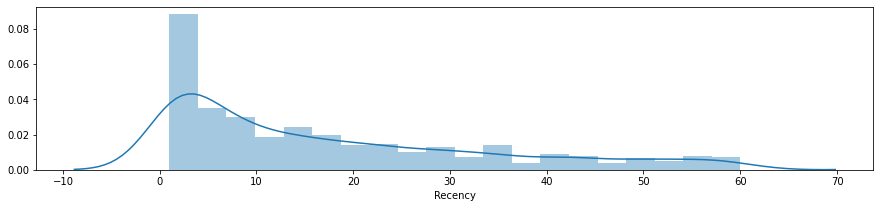

In [30]:
# Plot distribution of Recency
plt.figure(figsize=(15,3))
sns.distplot(sales_by_card['Recency'])

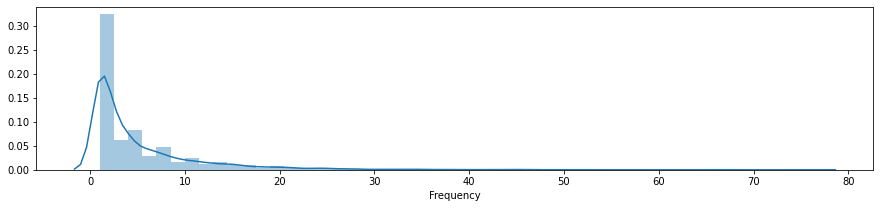

In [31]:
# Plot distribution of Frequency
plt.figure(figsize=(15,3))
sns.distplot(sales_by_card['Frequency'])

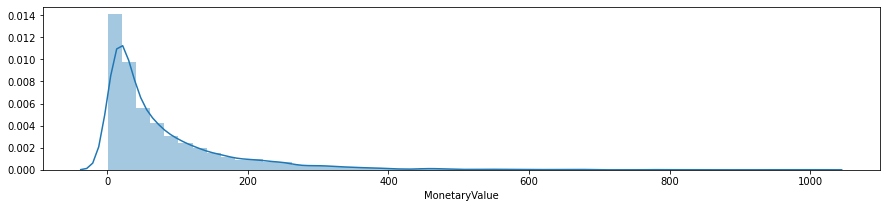

In [32]:
# Plot distribution of Monetary value
plt.figure(figsize=(15,3))
sns.distplot(sales_by_card['MonetaryValue'])

Visual analysis identidied data skewed to the right. Now, using the .qcut() function, relative values from 1 to 4 will be assigned accordinly to the dataset quartile for each variable (R, F, M).

In [33]:
#checking data frame format types
sales_by_card.dtypes

Recency            int64
Frequency          int64
MonetaryValue    float64
dtype: object

In [34]:
#let review df general stats to detect any potential outlier
sales_by_card.describe()

,Recency,Frequency,MonetaryValue
count,4399.000000,4399.000000,4399.000000
mean,17.398045,5.283701,80.261585
std,16.550555,6.816205,97.506844
min,1.000000,1.000000,0.640000
25%,3.000000,1.000000,18.355833
50%,11.000000,3.000000,43.890801
75%,28.000000,7.000000,105.436816
max,60.000000,76.000000,1006.146150


In [35]:
#creating labels for Recency, Frequency and Monetary
r_labels = range(4, 0, -1); f_labels = range(1, 5); m_labels = range(1, 5)

In [36]:
#for each RFM value in df, assign value in the labels, respetive to 4 equal percentile groups
r_groups = pd.qcut(sales_by_card['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(sales_by_card['Frequency'].rank(method='first'), q=4, labels=f_labels)
m_groups = pd.qcut(sales_by_card['MonetaryValue'], q=4, labels=m_labels)

In [37]:
# Create new columns R, F and M into df
sales_by_card = sales_by_card.assign(R = r_groups.values, F = f_groups.values, M = m_groups.values)
sales_by_card.head(3)

,Recency,Frequency,MonetaryValue,R,F,M
Card_ID,,,,,,
9160000047700,2,6,171.080323,4,3,4
9160000072177,1,2,135.802819,4,2,4
9160000108180,7,1,73.947205,3,1,3


In [38]:
#convert RFM values to string and then concatenate RFM values
sales_by_card.R = sales_by_card.R.astype(str)
sales_by_card.F = sales_by_card.F.astype(str)
sales_by_card.F = sales_by_card.M.astype(str)
sales_by_card["RFM"] = sales_by_card.R+sales_by_card.F+sales_by_card.F
rfm_df = sales_by_card.copy()
rfm_df.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM
Card_ID,,,,,,,
9160000047700,2,6,171.080323,4,4,4,444
9160000072177,1,2,135.802819,4,4,4,444
9160000108180,7,1,73.947205,3,3,3,333


In [39]:
# Count number of unique identified segments
rfm_count_unique = rfm_df.groupby('RFM')['RFM'].count()
print("# of unique identified segments:", rfm_count_unique.count())
print("which stills high for segmentation, therefore we will try another industry approach, by summing RFM")

# of unique identified segments: 16
which stills high for segmentation, therefore we will try another industry approach, by summing RFM


In [40]:
# Summing RFM_Score, need to convert previous concatenated values to Integer and than Sum()
rfm_df.R = rfm_df.R.astype(int)
rfm_df.F = rfm_df.F.astype(int)
rfm_df.M = rfm_df.M.astype(int)
rfm_df["RFM_Sum"] = rfm_df.R + rfm_df.F + rfm_df.M
rfm_df.head(3)

,Recency,Frequency,MonetaryValue,R,F,M,RFM,RFM_Sum
Card_ID,,,,,,,,
9160000047700,2,6,171.080323,4,4,4,444,12
9160000072177,1,2,135.802819,4,4,4,444,12
9160000108180,7,1,73.947205,3,3,3,333,9


In [41]:
#create python function to assign a Segment based on customer RFM sum score. Segment names based on industry standarts.
def rfm_segment(df):
    if df['RFM_Sum'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Sum'] >= 8) and (df['RFM_Sum'] < 9)):
        return 'Champions'
    elif ((df['RFM_Sum'] >= 7) and (df['RFM_Sum'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Sum'] >= 6) and (df['RFM_Sum'] < 7)):
        return 'Potential'
    elif ((df['RFM_Sum'] >= 5) and (df['RFM_Sum'] < 6)):
        return 'Promising'
    elif ((df['RFM_Sum'] >= 4) and (df['RFM_Sum'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'

In [42]:
# Create a new variable RFM_Level
rfm_df['RFM_Segment'] = rfm_df.apply(rfm_segment, axis=1)
rfm_df.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM,RFM_Sum,RFM_Segment
Card_ID,,,,,,,,,
9160000047700,2,6,171.080323,4,4,4,444,12,Can't Loose Them
9160000072177,1,2,135.802819,4,4,4,444,12,Can't Loose Them
9160000108180,7,1,73.947205,3,3,3,333,9,Can't Loose Them
9160000137227,32,4,126.920410,1,4,4,144,9,Can't Loose Them
9160000168443,2,4,34.611240,4,2,2,422,8,Champions


In [43]:
#grouping customers and calculating average values for each RFM_Level, to than return the size of each segment 
rfm_segments_df = rfm_df.groupby('RFM_Segment').agg({
                                                    'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'MonetaryValue': ['mean', 'count']}).round(1)

In [44]:
#table to summarize and depict out customer segmentation based on RFM summing values. Total of 4.399 customers "count"
rfm_segments_df

Recency Frequency MonetaryValue      
                      mean      mean          mean count
RFM_Segment                                             
Can't Loose Them       5.2      10.4         160.9  1730
Champions             13.7       3.5          56.5   459
Loyal                 20.5       2.6          43.9   379
Needs Attention       19.5       1.3          10.3   357
Potential             16.3       2.0          26.1   435
Promising             32.0       1.4          22.7   551
Require Activation    44.6       1.1           9.6   488

In [45]:
#to conclude, lets visualize this results into a Tree Map, with the support on squarify lib
import squarify

In [46]:
#organize and rename colums
rfm_segments_df.columns = rfm_segments_df.columns.droplevel()
rfm_segments_df.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']

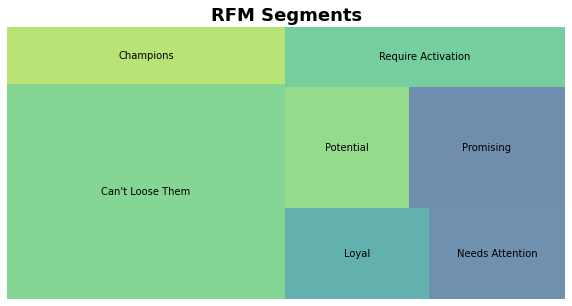

In [47]:
#create our plot, organize data frame and plot resutls. *I want to fix the colors better, but so far, I coundlt. rsrsrs :)
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(10, 5)
squarify.plot(sizes=rfm_segments_df['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Promising', 
                     'Require Activation'], alpha=.7 )
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

In [48]:
#export RFM df, to be analyzed using tableu Desktop.
export_csv = rfm_segments_df.to_csv(r'C:\\Datasets\\Data_RFM.csv', index = True)

# Cluster Analysis k-means
A frequent used algorithm for drawing insights into the formations and separations within data. Is marketing, is often used to build customer segments and understand the bahaviours of these different segments. <br>
Source: https://www.mktr.ai/applications-and-methods-in-data-science-customer-segmentation/

In [49]:
# again, lets use groupby to aggregate sales by CustomerID, but this time we are looking only at sum sales and frequency.
customer_df = sales_customer_df.groupby('Card_ID').agg({'Sum_Value': sum, 
                                            'Basket_ID': lambda x: x.nunique()})
customer_df.head()

,Sum_Value,Basket_ID
Card_ID,,
9160000047700,171.080323,6
9160000072177,135.802819,2
9160000108180,73.947205,1
9160000137227,126.920410,4
9160000168443,34.611240,4


In [50]:
# renaming the columns, as desired output and copy/past of aggregated values
customer_df.rename(columns={'Sum_Value': 'TotalSales',
                             'Basket_ID': 'OrderCount'}, inplace=True)
customer_df = customer_df.copy()
customer_df.head(3)

,TotalSales,OrderCount
Card_ID,,
9160000047700,171.080323,6
9160000072177,135.802819,2
9160000108180,73.947205,1


In [51]:
#creating new column 'AvgOrderValu'
customer_df['AvgOrderValue'] = customer_df['TotalSales'] / customer_df['OrderCount']
customer_df.head(3)

,TotalSales,OrderCount,AvgOrderValue
Card_ID,,,
9160000047700,171.080323,6,28.513387
9160000072177,135.802819,2,67.901409
9160000108180,73.947205,1,73.947205


In [52]:
#Normalize Data, since clustering algotirhms like K-means are sensitive to the scales of the data used.
rank_df = customer_df.rank(method='first')
normalized_df = (rank_df - rank_df.mean()) / rank_df.std()
normalized_df.head()

,TotalSales,OrderCount,AvgOrderValue
Card_ID,,,
9160000047700,1.276352,0.698411,1.346429
9160000072177,1.099190,-0.595263,1.714138
9160000108180,0.525186,-1.731460,1.720437
9160000137227,1.033050,0.270073,1.455088
9160000168443,-0.236216,0.270861,-1.018877


In [53]:
#check normalized statis. = Our data is scaled between -2 and 2. Now let’s get to clustering.
normalized_df.describe()

,TotalSales,OrderCount,AvgOrderValue
count,4.399000e+03,4.399000e+03,4.399000e+03
mean,-1.584951e-17,9.714136e-17,5.501901e-18
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731460e+00,-1.731460e+00,-1.731460e+00
25%,-8.657301e-01,-8.657301e-01,-8.657301e-01
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.657301e-01,8.657301e-01,8.657301e-01
max,1.731460e+00,1.731460e+00,1.731460e+00


# Select the optimal number of clusters
2 approaches: 1) silhouette coefficient, and (2) the elbow method.

Silhouette refers to a method of interpretation and validation of consistency within clusters of data.
The silhoutte value is a measure of how similar an objetc is to it's own cluster (cohension) compared
to other clusters (separation). It ranges for -1 to + 1, high value = well matched to its own cluster
and poorly matched to neighboring clusters. The silhoutte can be calculated with any distance metric, such as the Euclidean distance. Source: Wikipedia.

In [54]:
#import sklearn libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [55]:
# Use silhouette coefficient to determine the best number of clusters
for n_cluster in [3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=n_cluster).fit(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
    
    silhouette_avg = silhouette_score(
        normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']], 
        kmeans.labels_)
    
    print('Silhouette Score for %i Clusters: %0.4f' % (n_cluster, silhouette_avg))

Silhouette Score for 3 Clusters: 0.4367
Silhouette Score for 4 Clusters: 0.4083
Silhouette Score for 5 Clusters: 0.4007
Silhouette Score for 6 Clusters: 0.3819
Silhouette Score for 7 Clusters: 0.3727
Silhouette Score for 8 Clusters: 0.3749


# The Elbow Method with the Sum of Squared Errors (SSE)
The idea behind elbow method is to run k-means clustering on a give dataset for a range of values of k(num_clusters, eg: K=1 to 10), and for each value of K, calculate the sum o squared errors (SSE). Ploting the line graph of the SSE for each value of K, depicts a line that looks like an arm. The elbow on the arm is the value of option K (number of cluster). The goal is to choose a small value of K that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing K. Source: StackOverflow

In [56]:
from sklearn import cluster

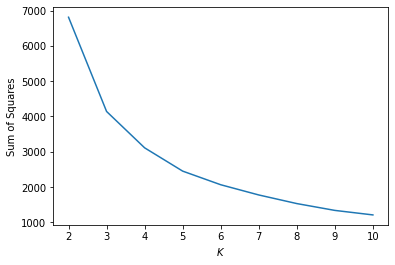

In [57]:
# use the elbow method to see if it agrees with our previous results suggesting 3 to 4 clusters.
sse = []
krange = list(range(2,11))
X = normalized_df[['TotalSales','OrderCount','AvgOrderValue']].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

Based on the graph above, it looks like K=4, or 4 clusters is the optimal number of clusters for this analysis

In [58]:
#Now let’s interpret the customer segments provided by these clusters.
#run kmeans with 4 cluster parameter defined
kmeans = KMeans(n_clusters=4).fit(normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']])
#create a new df to store the kmean output. New collum
four_cluster_df = normalized_df[['TotalSales', 'OrderCount', 'AvgOrderValue']].copy(deep=True)
four_cluster_df['Cluster'] = kmeans.labels_
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Card_ID,,,,
9160000047700,1.276352,0.698411,1.346429,1
9160000072177,1.099190,-0.595263,1.714138,2
9160000108180,0.525186,-1.731460,1.720437,2
9160000137227,1.033050,0.270073,1.455088,1
9160000168443,-0.236216,0.270861,-1.018877,0


In [59]:
#Now let’s group the cluster metrics and see what we can gather from the normalized data for each cluster.
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]
data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)
cluster_center_df.columns = four_cluster_df.columns[0:3]
cluster_center_df.head()

,TotalSales,OrderCount,AvgOrderValue
0,0.520155,0.898501,-0.664783
1,1.143205,0.910603,0.740168
2,-0.275909,-0.801551,0.941749
3,-1.229849,-0.822802,-1.039006


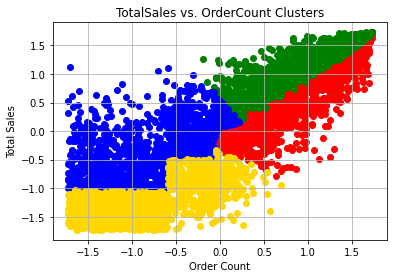

In [100]:
#For this next piece, we are going to visualize the clusters by putting the different columns on the x and y-axes.
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'],
    c='green')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'],
    c='gold')

plt.title('TotalSales vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Total Sales')

plt.grid()
plt.show()

Customer in Yellow: low total sales and low order count | on the oposite side: | Customer in green: high total sales and high order count. <br>
Customer in Blue: high total sales but low order count | on the oposite side: | Customer in red: high total sales but low order count. <br> Key takeaway: Green = highest value customers

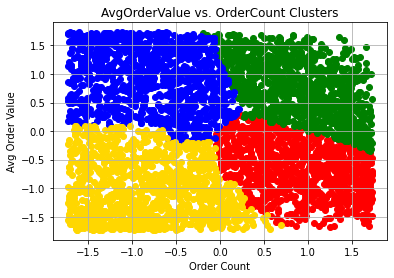

In [101]:
#2nd plot, but now by Avg order value vs order counts
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='green')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['OrderCount'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='gold')

plt.title('AvgOrderValue vs. OrderCount Clusters')
plt.xlabel('Order Count')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

In this second plot, we are looking now at the Average Order Value vs Order Count. Customer in green are the highest value. <br>
Potential marketing actions: <br> 
Blue cluster: Attempt to find ways to increase their order count with e-mail remainder/sms push notification. eg (discount if they return within 30 days or delayed cupon to be in specific time period.) <br>
Red cluster: try some cross-selling and up-selling techniques. quick pop-up with an offer, based on market basked analysis.

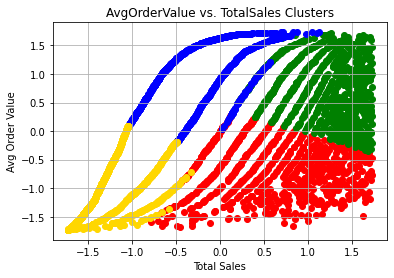

In [102]:
# 3rd plot
plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 0]['AvgOrderValue'],
    c='red')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 1]['AvgOrderValue'],
    c='green')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 2]['AvgOrderValue'],
    c='blue')

plt.scatter(
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['TotalSales'], 
    four_cluster_df.loc[four_cluster_df['Cluster'] == 3]['AvgOrderValue'],
    c='gold')

plt.title('AvgOrderValue vs. TotalSales Clusters')
plt.xlabel('Total Sales')
plt.ylabel('Avg Order Value')

plt.grid()
plt.show()

This third plot, we have the average order value versus total sales clusters. <br>
This plot further substantiates the previous 2 plots in identifying the green cluster as the highest value customers, yelow as the lowest value customers, and the blue and red as high opportunity customers.<br>
Looking to growth revenue actions, marketing could focus on better understanding opportunities clusters (blue and red) behaviour.

# Find the best-selling item by segment

In [75]:
# clean and organize taxonomy df and add key valye
taxonomy_df.head(3)

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription
0,10,11,DRINKS,261,BEVERAGES,1,cola
1,10,11,DRINKS,261,BEVERAGES,2,lime
2,10,11,DRINKS,261,BEVERAGES,3,juice


In [76]:
#check data type before merge
taxonomy_df.dtypes

CategoryA                int64
CategoryB                int64
CategoryBDescription    object
CategoryC                int64
CategoryCDescription    object
CategoryD                int64
CategoryDDescription    object
dtype: object

In [77]:
#to avoid summing taxonomy codes, transform into string before concatenation
taxonomy_df["Key"] = taxonomy_df["CategoryA"].astype(str)+taxonomy_df["CategoryB"].astype(str)+taxonomy_df["CategoryC"].astype(str)+taxonomy_df["CategoryD"].astype(str)
taxonomy_df.head(3)

,CategoryA,CategoryB,CategoryBDescription,CategoryC,CategoryCDescription,CategoryD,CategoryDDescription,Key
0,10,11,DRINKS,261,BEVERAGES,1,cola,10112611
1,10,11,DRINKS,261,BEVERAGES,2,lime,10112612
2,10,11,DRINKS,261,BEVERAGES,3,juice,10112613


In [78]:
#after concatenation, drop unnecessary columns
taxonomy_df.drop(["CategoryA", "CategoryB", "CategoryC", "CategoryD"], axis = 1, inplace = True)
taxonomy_df.head()

,CategoryBDescription,CategoryCDescription,CategoryDDescription,Key
0,DRINKS,BEVERAGES,cola,10112611
1,DRINKS,BEVERAGES,lime,10112612
2,DRINKS,BEVERAGES,juice,10112613
3,DRINKS,BEVERAGES,sport drinks,10112615
4,DRINKS,BEVERAGES,tea,10112616


In [86]:
#organize display layout.
taxonomy_df = taxonomy_df[['Key', 'CategoryBDescription', 'CategoryCDescription', 'CategoryDDescription']]
taxonomy_df.head(3)

,Key,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,10112611,DRINKS,BEVERAGES,cola
1,10112612,DRINKS,BEVERAGES,lime
2,10112613,DRINKS,BEVERAGES,juice


In [87]:
#some records identified with same key values and small changes into D description, hence, drop duplicated value
taxonomy_df.drop_duplicates(subset ="Key", 
                             keep = False, inplace = True)

In [88]:
#copy sliced values
taxonomy_df = taxonomy_df.copy()

In [89]:
print("Current cleaned Sales Dataset has: ",sales_data.shape[0], "records")

Current cleaned Sales Dataset has:  232814 records


In [90]:
sales_barcode_desc_df = pd.merge(sales_data, taxonomy_df,on="Key", how="left")
print("Total Records after dropping NaN taxonomy values:",sales_barcode_desc_df.shape[0])

Total Records after dropping NaN taxonomy values: 232814


In [91]:
sales_barcode_desc_df.head(3)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Key,CategoryBDescription,CategoryCDescription,CategoryDDescription
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10142392,Grocery Food,pet,cat
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10122811,Detergents,laundry,wash
2,1092750793,2013-03-13,520423907421,6,1.740015,9164012915385,10142392,Grocery Food,pet,cat


In [92]:
#concatenate description for unique descp.
sales_barcode_desc_df["Description"] = sales_barcode_desc_df["CategoryBDescription"]+"-"+sales_barcode_desc_df["CategoryCDescription"]+"-"+sales_barcode_desc_df["CategoryDDescription"]                               
sales_barcode_desc_df.head(2)

,Basket_ID,Date,Barcode,Sum_Units,Sum_Value,Card_ID,Key,CategoryBDescription,CategoryCDescription,CategoryDDescription,Description
0,1103084867,2013-04-15,800220505783,2,1.960000,9160003751260,10142392,Grocery Food,pet,cat,Grocery Food- pet -cat
1,1103853519,2013-04-17,520139501183,1,5.349993,9164001986624,10122811,Detergents,laundry,wash,Detergents-laundry-wash


In [103]:
# identify best selling item per cluster = Blue
blue_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 2]

blue_best_item_df = pd.DataFrame(sales_barcode_desc_df.loc[sales_barcode_desc_df['Card_ID'].isin(blue_cluster.index)].groupby(
                    'Description').count()['Barcode'].sort_values(ascending=False).head())
blue_best_item_df.head()

,Barcode
Description,
products thatn expire soon-FRESH MILK-high pasterized,352
products thatn expire soon-FRESH MILK-fresh milk,262
DRINKS-BEVERAGES-cola,250
products thatn expire soon-yoghurt-white,247
Grocery Food-special packed bread-LIMITED DURATION,222


In [104]:
# identify best selling item per cluster = red
red_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 0]

red_best_item_df = pd.DataFrame(sales_barcode_desc_df.loc[sales_barcode_desc_df['Card_ID'].isin(red_cluster.index)].groupby(
                    'Description').count()['Barcode'].sort_values(ascending=False).head())
red_best_item_df.head()

,Barcode
Description,
products thatn expire soon-FRESH MILK-fresh milk,2111
products thatn expire soon-FRESH MILK-high pasterized,1214
DRINKS-BEVERAGES-cola,953
products thatn expire soon-yoghurt-white,932
fruits and vegetables-fresh vegetables-ONMS - Dried garlic,877


In [105]:
# identify best selling item per cluster = green | change for category B description
green_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 1]

green_best_item_df = pd.DataFrame(sales_barcode_desc_df.loc[sales_barcode_desc_df['Card_ID'].isin(green_cluster.index)].groupby(
                    'CategoryBDescription').count()['Barcode'].sort_values(ascending=False).head())
green_best_item_df.head()

,Barcode
CategoryBDescription,
Grocery Food,25873
fruits and vegetables,9972
Detergents,9535
products thatn expire soon,7261
DAIRY PRODUCTS,6519


In [106]:
# identify best selling item per cluster = yellow
yellow_cluster = four_cluster_df.loc[four_cluster_df['Cluster'] == 3]

yellow_best_item_df = pd.DataFrame(sales_barcode_desc_df.loc[sales_barcode_desc_df['Card_ID'].isin(yellow_cluster.index)].groupby(
                    'CategoryBDescription').count()['Barcode'].sort_values(ascending=False).head())
yellow_best_item_df.head()

,Barcode
CategoryBDescription,
Grocery Food,2421
fruits and vegetables,947
Detergents,889
products thatn expire soon,691
DRINKS,548


In [97]:
four_cluster_df.head()

,TotalSales,OrderCount,AvgOrderValue,Cluster
Card_ID,,,,
9160000047700,1.276352,0.698411,1.346429,1
9160000072177,1.099190,-0.595263,1.714138,2
9160000108180,0.525186,-1.731460,1.720437,2
9160000137227,1.033050,0.270073,1.455088,1
9160000168443,-0.236216,0.270861,-1.018877,0


In [ ]:
#analysis could go deeper into matching card_id with loyalty information to find more information about cluster 1,2,3,4
loyalty_df.head()

The limitation of the Cluster Analysis k-means is that only considers value sold and frequency. It does not hep to identify the customer shopping mission (why did he went to the store). <br>
The RFM model, adds a third dimension(recency) but it also fails to identify the customer mission. <br>
For this, we will use the customer segmentation, based on basket segmentation. 

Key takeaways: <br>
Cluster K-means: identify opportunitties segments (blue,red) <br>
RFM: identify departing customer and act to retain them. 